## 感知机

### 两类问题

In [1]:
# data import
import torch
from torchvision.models import AlexNet
from torchviz import make_dot
import matplotlib.pyplot as plt
import numpy as np

xdim =[(-0.1,-0.2),(0.5,0.5),(-0.5,0.2),(-0.25,0.5),(0.2,0.1),(0,0.8)]
ldim =[-1,1,-1,-1,1,1]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# rate = 0.5  

class Perceptron():
    def __init__(self, rate=0.5):
        self.w = np.ones(2, dtype=np.float32)
        self.b = 0
        self.rate = rate  # 初始化学习率
        print('learning rate = ' + str(self.rate))
    
    def fit(self, x_train, y_train):
        while True:
            flag = True  
            for i in range(len(x_train)):  
                xi = x_train[i]
                yi = y_train[i]
                if yi * (np.inner(self.w, xi) + self.b) <= 0:
                    flag = False  
                    self.w += self.rate * np.dot(xi, yi)
                    self.b += self.rate * yi
            if flag:
                break
        print('w = ' + str(self.w) + ', b = ' + str(self.b))
    
    
    def show(self, data, labels):
        x_ = np.linspace(-1, 1, 10)
        y_ = -(self.w[0] * x_ + self.b) / self.w[1]
        # 画出这条直线
        plt.plot(x_, y_)
        for x, label in zip(data, labels):
            if label == 1:
                plt.scatter(x[0], x[1], marker='o', color='blue', s=100)
            else:
                plt.scatter(x[0], x[1], marker='+', color='red', s=100)
            plt.text(x[0]+0.05, x[1], '(%3.1f,%3.1f)' % (x[0], x[1]))
        plt.axis([-0.8, 0.8, -0.25, 1])
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Perceptron Algorithm for Classification')
        plt.grid(True)
        plt.show()

In [3]:
# Draw the structure of the perceptron network
from graphviz import Digraph

def draw_perceptron_network(perceptron, input_dim, filename='perceptron_network.png'):
    dot = Digraph()

    for i in range(input_dim):
        dot.node(f'X{i+1}', f'X{i+1}')
    dot.node('Y', 'Y')
    for i in range(input_dim):
        dot.edge(f'X{i+1}', 'Y', label=f'w{i+1}={perceptron.w[i]:.2f}')
    dot.edge('bias', 'Y', label=f'b={perceptron.b:.2f}')
    dot.render(filename, format='png', cleanup=True)

learning rate = 0.5
w = [1.45 0.6 ], b = 0.0


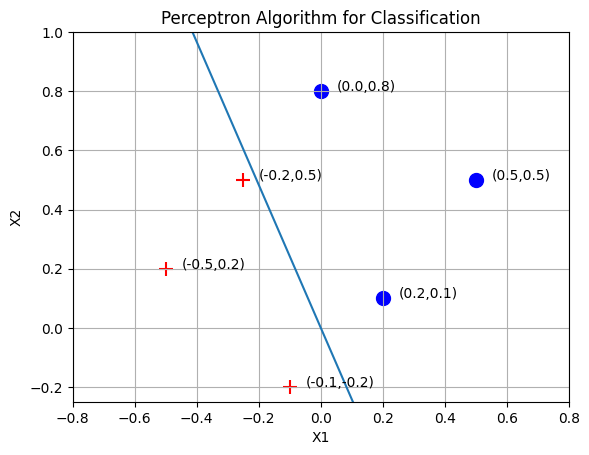

learning rate = 1.0
w = [1.45 0.6 ], b = 0.0
learning rate = 0.1
w = [1.05 0.9 ], b = -0.2
learning rate = 0.01
w = [1.0500011 0.9000001], b = -0.20000000000000004
learning rate = 0.2
w = [1.05 0.9 ], b = -0.2
learning rate = 2.0
w = [1.9 0.2], b = 0.0


In [4]:

data = np.array(xdim)
label = np.array(ldim)

perceptron = Perceptron(rate=0.5)
perceptron.fit(data, label)
perceptron.show(data, label)
draw_perceptron_network(perceptron,input_dim=2)

perceptron_1 = Perceptron(rate=1.0)
perceptron_1.fit(data, label)

perceptron_2 = Perceptron(rate=0.1)
perceptron_2.fit(data, label)

perceptron_3 = Perceptron(rate=0.01)
perceptron_3.fit(data, label)

perceptron_4 = Perceptron(rate=0.2)
perceptron_4.fit(data, label)

perceptron_5 = Perceptron(rate=2.0)
perceptron_5.fit(data, label)

#### 感知机网络结构结果图
![](perceptron_network.png.png)  

#### 不同学习率下的 $\omega$ 和 $b$

| 学习率 | w1   | w2   | b    |
|--------|------|------|------|
| 0.01    | 1.05  | 0.9  | -0.2  |
| 0.1    | 1.05  | 0.9  | -0.2  |
| 0.2    | 1.05  | 0.9  | -0.2  |
| 0.5    | 1.45  | 0.6  | 0.0  |
| 1.0    | 1.45  | 0.6  | 0.0  |
| 2.0    | 1.9  | 0.2  | 0.0  |


### 字母七分类问题

In [5]:
# data import
A_1 = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]
B_1 = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1 ,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
C_1 = [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
K_1 = [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1 ,0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
J_1 = [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0 ,0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
E_1 = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1 ,0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
D_1 = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1 ,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

A_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
B_2 = [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
C_2 = [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
K_2 = [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
J_2 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
E_2 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
D_2 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

A_3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
B_3 = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
C_3 = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
K_3 = [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
J_3 = [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
E_3 = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
D_3 = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

#### 简单感知机网络及封装

In [6]:
# Basic 
import numpy as np
import random

data = [
    A_1, B_1, C_1, K_1, J_1, E_1, D_1,
    A_2, B_2, C_2, K_2, J_2, E_2, D_2,
    A_3, B_3, C_3, K_3, J_3, E_3, D_3
]

labels = [0, 1, 2, 3, 4, 5, 6] * 3
label_to_char = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'K',
    4: 'J',
    5: 'E',
    6: 'D'
}

def training(data, labels):
    X = np.array(data)
    y = np.array(labels)

    num_classes = 7
    num_features = X.shape[1]
    weights = np.zeros((num_classes, num_features))
    biases = np.zeros(num_classes)
    eta = 0.01  # learning rate
    epochs = 10  # epochs
    # Training
    for epoch in range(epochs):
        for i in range(len(X)):
            for c in range(num_classes):
                if (y[i] == c and np.dot(X[i], weights[c]) + biases[c] <= 0) or (y[i] != c and np.dot(X[i], weights[c]) + biases[c] > 0):
                    weights[c] += eta * (y[i] == c) * X[i]
                    biases[c] += eta * (y[i] == c)
    return weights, biases

def predict(x, weights, biases):
    scores = np.dot(weights, x) + biases
    return np.argmax(scores)

def test_perceptron(test_data, test_labels, weights, biases):
    correct = 0
    for i, x in enumerate(test_data):
        predicted = predict(x, weights, biases)
        true_label = test_labels[i]
        if predicted == true_label:
            correct += 1
    accuracy = correct / len(test_data)
    # print(f"Accuracy: {accuracy * 100:.2f}%")
    return accuracy

def classify(input_array, weights, biases):
    predicted_label = predict(input_array, weights, biases)
    predicted_char = label_to_char[predicted_label]
    print(f"Input: {input_array}")
    print(f"Predicted class: {predicted_char}")

# Function to add noise to the input array
def add_noise_point(input_array):
    pixel_index = random.randint(0, len(input_array) - 1)
    input_array[pixel_index] = 1 if input_array[pixel_index] == -1 else -1
    return input_array

weights, biases = training(data, labels)

# Task1: Test the perceptron model using the original data
accuracy_original = test_perceptron(data, labels, weights, biases)
print(f"Accuracy with original data: {accuracy_original * 100:.2f}%")
test_normal = C_1
classify(test_normal, weights, biases)

# Task2: Test the perceptron model using the data with one noise
data_with_one_noise = [add_noise_point(sample.copy()) if i == 2 else sample for i, sample in enumerate(data)]
accuracy_one_noise = test_perceptron(data_with_one_noise, labels, weights, biases)
print(f"Accuracy with one noise: {accuracy_one_noise * 100:.2f}%")
test_one_noise = data_with_one_noise[2]
classify(test_one_noise, weights, biases)

# Optional Task1: Train the perceptron model using the data with two noise
data_with_two_noises = [add_noise_point(sample.copy()) if i in [2, 9] else sample for i, sample in enumerate(data)]
accuracy_two_noises = test_perceptron(data_with_two_noises, labels, weights, biases)
print(f"Accuracy with two noises: {accuracy_two_noises * 100:.2f}%")
test_two_noises = data_with_two_noises[9]
classify(test_two_noises, weights, biases)


Accuracy with original data: 95.24%
Input: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
Predicted class: C
Accuracy with one noise: 95.24%
Input: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
Predicted class: C
Accuracy with two noises: 90.48%
Input: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
Predicted class: D


In [7]:
# Optional Task2-1: Train the perceptron model using the data only with A_1 to D_1
data_1 = data[:7]
labels_1 = labels[:7]
weights_1, biases_1 = training(data_1, labels_1)
accuracy_1 = test_perceptron(data_1, labels_1, weights_1, biases_1)
print(f"Accuracy with data_1: {accuracy_1 * 100:.2f}%")
test_data_1 = C_1
classify(test_data_1, weights_1, biases_1)

# Optional Task2-2: Train the perceptron model using the data_1 with one noise
data_1_with_one_noise = [add_noise_point(sample.copy()) if i == 2 else sample for i, sample in enumerate(data_1)]
accuracy_1_one_noise = test_perceptron(data_1_with_one_noise, labels_1, weights_1, biases_1)
print(f"Accuracy with data_1 with one noise: {accuracy_1_one_noise * 100:.2f}%")
test_data_1_one_noise = data_1_with_one_noise[2]
classify(test_data_1_one_noise, weights_1, biases_1)


Accuracy with data_1: 100.00%
Input: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
Predicted class: C
Accuracy with data_1 with one noise: 100.00%
Input: [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, -1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
Predicted class: C


In [8]:
# Optional Task 3: Train the perceptron model with different learing rate
def training_with_different_learning_rate(data, labels, eta):
    X = np.array(data)
    y = np.array(labels)

    num_classes = 7
    num_features = X.shape[1]
    weights = np.zeros((num_classes, num_features))
    biases = np.zeros(num_classes)
    epochs = 10  # epochs
    # Training
    for epoch in range(epochs):
        for i in range(len(X)):
            for c in range(num_classes):
                if (y[i] == c and np.dot(X[i], weights[c]) + biases[c] <= 0) or (y[i] != c and np.dot(X[i], weights[c]) + biases[c] > 0):
                    weights[c] += eta * (y[i] == c) * X[i]
                    biases[c] += eta * (y[i] == c)
    return weights, biases

# Using different learning rate to train the model based on the original data(with no noise)
etas = [0.001, 0.01, 0.1, 1, 10]
accuracies = []
for eta in etas:
    weights_eta, biases_eta = training_with_different_learning_rate(data, labels, eta)
    accuracy_eta = test_perceptron(data, labels, weights_eta, biases_eta)
    accuracies.append(accuracy_eta)
    print(f"Accuracy with learning rate {eta}: {accuracy_eta * 100:.2f}%")


Accuracy with learning rate 0.001: 100.00%
Accuracy with learning rate 0.01: 95.24%
Accuracy with learning rate 0.1: 95.24%
Accuracy with learning rate 1: 95.24%
Accuracy with learning rate 10: 95.24%


### 证明：对于线性可分的两类数据集合，使用感知机算法进行分类，感知机算法收敛步骤数量的上限与学习速率无关。

通过感知机收敛定理(Perceptron Convergence Theorem)：对于线性可分的两类数据，感知机算法在有限步内必定会收敛，并找到一个能够正确分类所有样本的线性分类器。
#### 问题描述：
给定一组线性可分的训练样本集合 $\{(\mathbf{x}_i, y_i)\}$，其中 $\mathbf{x}_i \in \mathbb{R}^n$ 是输入，$y_i \in \{-1, 1\}$ 是其对应的类别标签。感知机的目标是找到一个线性分类器，即权重向量 $\mathbf{w}$ 和偏置 $b$，使得对于所有样本 $\mathbf{x}_i$，满足：
$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) > 0
$$

感知机算法通过梯度下降更新权重来找到这样的分类器。其更新规则为：
$$
\mathbf{w} \leftarrow \mathbf{w} + \eta y_i \mathbf{x}_i
$$
$$
b \leftarrow b + \eta y_i
$$
其中，$\eta$ 是学习率，表示每次更新时步长的大小。

#### 证明
1. **假设与定义**：
   - 假设存在某个超平面 $\mathbf{w}^*$ 和 $b^*$，能够完美地将数据线性分开，即满足：
     $$
     y_i (\mathbf{w}^* \cdot \mathbf{x}_i + b^*) > 0 \quad \forall i
     $$
   - 令 $R$ 表示输入向量 $\mathbf{x}_i$ 的最大长度：
     $$
     R = \max_i \|\mathbf{x}_i\|
     $$
   - 令 $\gamma$ 表示几何间隔，即最小的样本到分离超平面的距离：
     $$
     \gamma = \min_i \frac{y_i (\mathbf{w}^* \cdot \mathbf{x}_i + b^*)}{\|\mathbf{w}^*\|}
     $$
     因为数据是线性可分的，所以 $\gamma > 0$。

2. **感知机算法的更新**：
   感知机算法每次错误分类一个样本时，更新权重向量 $\mathbf{w}$ 和偏置 $b$。对于第 $t$ 次更新时的样本 $(\mathbf{x}_i, y_i)$，更新规则为：
   $$
   \mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} + \eta y_i \mathbf{x}_i
   $$
   $$
   b^{(t+1)} = b^{(t)} + \eta y_i
   $$

3. **内积的增长**：
   定义更新后的权重向量 $\mathbf{w}^{(t)}$ 与最优权重向量 $\mathbf{w}^*$ 的内积：
   $$
   \mathbf{w}^{(t+1)} \cdot \mathbf{w}^* = (\mathbf{w}^{(t)} + \eta y_i \mathbf{x}_i) \cdot \mathbf{w}^* = \mathbf{w}^{(t)} \cdot \mathbf{w}^* + \eta y_i (\mathbf{x}_i \cdot \mathbf{w}^*)
   $$
   由于 $y_i (\mathbf{w}^* \cdot \mathbf{x}_i) \geq \gamma \|\mathbf{w}^*\|$，则：
   $$
   \mathbf{w}^{(t+1)} \cdot \mathbf{w}^* \geq \mathbf{w}^{(t)} \cdot \mathbf{w}^* + \eta \gamma \|\mathbf{w}^*\|
   $$
   因此，随着每一次更新，内积的增长至少为 $\eta \gamma \|\mathbf{w}^*\|$。

4. **权重向量长度的增长**：
   现在分析权重向量的平方和如何增长：
   $$
   \|\mathbf{w}^{(t+1)}\|^2 = \|\mathbf{w}^{(t)} + \eta y_i \mathbf{x}_i\|^2 = \|\mathbf{w}^{(t)}\|^2 + 2 \eta y_i (\mathbf{w}^{(t)} \cdot \mathbf{x}_i) + \eta^2 \|\mathbf{x}_i\|^2
   $$
   由于 $y_i (\mathbf{w}^{(t)} \cdot \mathbf{x}_i) \leq 0$，因此：
   $$
   \|\mathbf{w}^{(t+1)}\|^2 \leq \|\mathbf{w}^{(t)}\|^2 + \eta^2 R^2
   $$
   这表明，随着每次更新，权重向量的长度最多增加 $\eta^2 R^2$。

5. **更新次数的上界**：
   通过结合内积的增长和权重向量长度的增长，可以给出收敛步骤的上限。

   首先，经过 $T$ 次更新后，内积的增加至少为 $T \eta \gamma \|\mathbf{w}^*\|$，即：
   $$
   \mathbf{w}^{(T)} \cdot \mathbf{w}^* \geq T \eta \gamma \|\mathbf{w}^*\|
   $$

   同时，权重向量的长度上界为：
   $$
   \|\mathbf{w}^{(T)}\|^2 \leq T \eta^2 R^2
   $$

   由于 $\mathbf{w}^{(T)} \cdot \mathbf{w}^* \leq \|\mathbf{w}^{(T)}\| \|\mathbf{w}^*\|$，我们有：
   $$
   T \eta \gamma \|\mathbf{w}^*\| \leq \|\mathbf{w}^{(T)}\| \|\mathbf{w}^*\|
   $$
   $$
   T \eta \gamma \|\mathbf{w}^*\| \leq \sqrt{T \eta^2 R^2} \|\mathbf{w}^*\|
   $$
   通过消去 $\|\mathbf{w}^*\|$，得到：
   $$
   T \eta \gamma \leq \sqrt{T} \eta R
   $$
   消去 $\eta$，得到：
   $$
   T \leq \left(\frac{R}{\gamma}\right)^2
   $$

   结果表明，**感知机算法的收敛步数上界与学习率 $\eta$ 无关**，它仅依赖于数据集的几何性质，即最大输入向量长度 $R$ 和几何间隔 $\gamma$。
